In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Görüntü Sıkıştırma

Bu görevde **görüntüleri** 🖼️ veri olarak kullanacağız.

Görüntü sıkıştırma için **K-means** kullanarak, bir görüntüdeki renkleri yalnızca en sık kullanılanlara indirgeyeceksiniz.

## 1) Python ile görüntüler

Bu bölüm, Python'da görüntüleri nasıl işlediğimizi anlamanıza yardımcı olacaktır.  

**1. bölüm için kodlama gerekmez, dikkatlice okuyun ve verilen örnekleri uygulayın.**

### 1.1) Siyah beyaz görüntüler

Bir görüntü, her bir öğesinin bir piksel olduğu bir matris olarak tanımlanabilir.  

Renk skalası 0 (siyah) ile 255 (beyaz) arasındadır.  

Böylece, matristeki her bir öğenin değeri 0 ile 255 arasında olacaktır.

<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">

Biz “matris” dedik, siz “numpy” düşündünüz, doğru 🙂  

👇 Aşağıdaki hücreyi çalıştırarak, yalnızca “numpy” ile oluşturulmuş siyah beyaz bir görüntüyü görebilirsiniz.

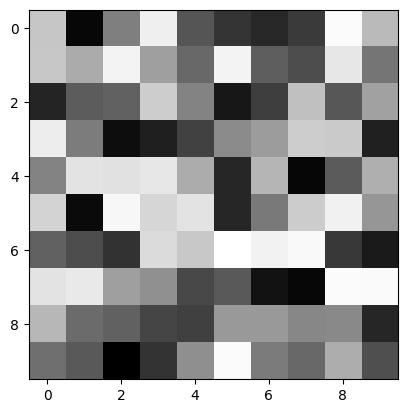

In [4]:
# 0 ile 255 arasında bir değere sahip 100 elemanlı bir vektör oluşturalım.
image_bw = np.random.uniform(low=0, high=255, size=100)

# Kare matris şeklinde yeniden şekillendirin, 10x10 piksel boyutunda bir görüntü elde ederiz.
image_bw = image_bw.reshape((10, 10))

# Son olarak oluşturulan görüntüyü göster
plt.imshow(image_bw, cmap='gray');

### 1.2) Renkli görüntüler :

Her renk, ana renklerin doğrusal bir kombinasyonudur: Kırmızı, Yeşil, Mavi  

Renkli bir görüntü, her bir ana renk için birer tane olmak üzere üç katmanın üst üste bindirilmesinden oluşur.  

Dolayısıyla her piksel için üç değerimiz vardır (Kırmızı, Yeşil, Mavi).

<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

👇  Yine, yalnızca `numpy` ile oluşturulmuş renkli bir görüntü görmek için aşağıdaki hücreleri çalıştırın.

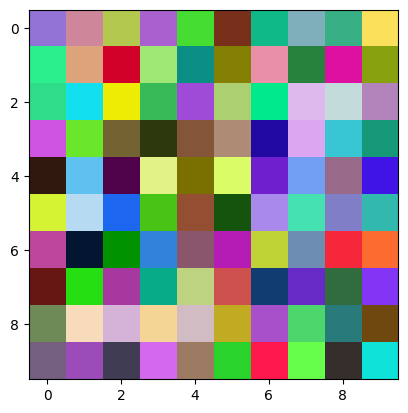

In [5]:
# 0 ile 1 arasında bir değere sahip 100*3 elemanlı bir vektör oluşturalım.
image_c = np.random.uniform(low=0., high=1., size=100*3)

# 3 renkli, 10x10 piksel boyutunda kare şeklinde bir görüntüye dönüştürün.
image_c = image_c.reshape((10, 10, 3))

# Son olarak oluşturulan görüntüyü göster
plt.imshow(image_c);

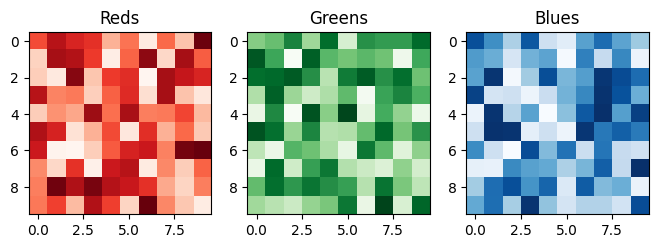

In [6]:
# Sezgisel bir fikir edinmek için, her renk katmanını çizelim.
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
colors = {0:'Reds', 1:'Greens', 2:'Blues'}

for i in colors:
    axs[i].imshow(image_c[:, :, i], cmap=colors[i])
    axs[i].set_title(colors[i])

## 2) ML için görüntüler

### 2.1) Kurulum

`skimage` kütüphanesini yükleyin, bu bize klasik görüntülere erişim sağlayacaktır.

In [7]:
! pip install --quiet scikit-image

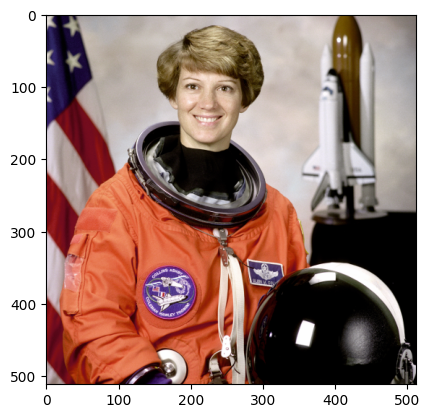

In [8]:
from skimage import data
img = data.astronaut()
plt.imshow(img);

❓ What is the shape of this image?  
Assign it to `img_shape`

In [16]:
img_shape=img.shape

### 2.2) Renk sayısı

Görüntümüzü sıkıştırmaya veya genel olarak makine öğrenimine hazır hale getirmek için, onu **gözlemler** ve **özellikler** olarak temsil etmemiz gerekir.  

Her **piksel** bir **gözlemdir**  
Her **renk değeri (Kırmızı, Yeşil, Mavi)** bir **özelliktir**  

Görüntümüzde **262.144 gözlem** (512 * 512 piksel) ve **3 özellik** (RGB) bulunmaktadır.

❓ Görüntüyü yeniden şekillendirin:  
- Mevcut 3 boyutlu şekli olan `width x height x 3`
- `n_piksel x 3` şeklindeki 2 boyutlu matrise, burada  `n_pixels = width * height`  

Yeniden şekillendirilen görüntüyü `X`'e atayın.

In [10]:
X=img.reshape(-1,3)
X

array([[154, 147, 151],
       [109, 103, 124],
       [ 63,  58, 102],
       ...,
       [  0,   0,   0],
       [  1,   1,   1],
       [  0,   0,   0]], dtype=uint8)

Renkli bir görüntü, 16 milyona kadar potansiyel renk içerebilir.  

Aslında, her piksel için **3** kanalımız vardır ve her kanal için **256** olası değerimiz vardır (0'dan 255'e kadar).  
Bu nedenle, renkli bir görüntüde potansiyel olarak maksimum **16.777.216** *($256^3$)* renk vardır.  

Görüntümüz sadece 262.144 piksel (512 * 512) olduğundan, her piksel üç kanalın değerleri tarafından tanımlanan tek bir renk içerdiğinden, en fazla 262.144 renk kullanır.

Hadi sayalım! 🕵️

❓ Bu resimdeki benzersiz renklerin sayısını `color_count` içinde saklayın.

In [13]:
unique_colors=np.unique(X,axis=0)
color_count=len(unique_colors)
color_count

113382

Elimizdekileri inceleyelim:
- 262.144 gözlem, her gözlem bir pikseldir
- Her gözlem için 3 özellik (Kırmızı, Yeşil ve Mavi değerleri)
- Bilinmeyen sayıda küme 😱

**Renk sayısını azaltmak için neler yapabileceğimize bakalım** 🎨

### 🧪 Kodunu Test Et

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('image_analysis',
                         img_shape = img_shape,
                         color_count = color_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S17D3-S-data-image-compressor/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_image_analysis.py::TestImageAnalysis::test_color_count PASSED       [ 50%]
test_image_analysis.py::TestImageAnalysis::test_img_shape PASSED         [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/image_analysis.pickle

git commit -m 'Completed image_analysis step'

git push origin master



## 3) K-means ile sıkıştırma

**113.382** rengi **K** renge indirmek istiyoruz.  

Pikseller üzerinde `KMeans` algoritması kullanarak, her pikseli **K** kümeden birine atayabiliriz!  

Her kümenin merkezi, o kümeye ait piksellerin ortalama rengi olacaktır. 

Daha sonra bu “ortalama küme rengini” kümedeki her piksel için RGB değeri olarak kullanabiliriz.  

💪🧠 Haydi başlayalım, hedefimiz sadece **32** renk kullanmak!

❓ ML hazır görüntünüz `X` üzerinde `n_clusters=32` ile bir K-means uyarlayın ve bunu `kmeans`'e atayın.

In [20]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=32)
kmeans.fit(X)

KMeans(n_clusters=32)

👉 `kmeans`'inizin `labels_`'ini kontrol edin, ardından `shape` ve `number of unique values`'ını kontrol edin.

In [28]:
print(kmeans.labels_)
print(kmeans.labels_.shape)
np.unique(kmeans.labels_).shape

[13 16 10 ...  0  0  0]
(262144,)


(32,)

☝️ Şöyle açıklayalım:

- Her etiket bir kümedir
- Her gözleme bir etiket atanmıştır
- Toplamda 32 farklı etiket vardır, her küme için bir tane

❓ `KMeans`'inizin `cluster_centers_` öğesini, şeklini ve ilk öğesini kontrol edin.

In [31]:
 kmeans.cluster_centers_

array([[  1.1136535 ,   0.56293715,   0.57310382],
       [170.73230289, 159.3897887 , 155.32935953],
       [210.71832349,  90.74339367,  55.01268028],
       [220.54272326, 210.91551819, 210.09385336],
       [ 91.94852941,   9.74195772,  19.60546875],
       [111.33386076,  82.00580169,  39.21387131],
       [170.2717186 , 138.78186969, 111.5601983 ],
       [229.16719673, 120.13866424,  82.76974103],
       [197.07703645, 187.48398617, 183.67099371],
       [138.99956217, 108.14732925,  78.37478109],
       [ 51.76409091,  36.65272727,  92.34636364],
       [176.88074462,  59.46170254,  18.62148536],
       [ 50.99576377,  43.89309743,  39.33939696],
       [150.1424685 , 139.13201604, 139.85882016],
       [ 77.32255062,  68.5845939 ,  65.33907377],
       [252.23859291, 249.44965588, 248.8717818 ],
       [127.80785627, 118.46239342, 116.66336784],
       [183.06036715, 174.32180468, 170.23542614],
       [152.71022727,  40.02173913,  10.14081028],
       [209.55556192, 198.89902

☝️Her cluster_center, RGB değerlerinin bir vektörüdür ve kümenin ortalama rengini temsil eder.

❓ Her piksel resmi için karşılık gelen kümenin ortalama rengini depolayan `X_compressed` dizisini oluşturun.

<details span="markdown">
    <summary>💡 Yardım</summary>

Bunu yalnızca `kmeans.cluster_centers_` ve `kmeans.labels_` kullanarak gerçekleştirebilirsiniz.

---

</details>

In [33]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]

RGB değerleri tamsayı olmalıdır.  

`X_compressed` içindeki renklerimiz `float64` türündedir.  

❓ `X_compressed` türünü, 0 ile 255 arasında değişen, işaretsiz 8 bitlik tamsayı türü olan `uint8` türüne dönüştürün.

In [34]:
X_compressed = X_compressed.astype('uint8')

❓ Kullanılan benzersiz renk sayısının gerçekten 32 olduğunu doğrulayın.

In [35]:
len(np.unique(X_compressed, axis=0))

32

In [36]:
X_compressed.shape

(262144, 3)

Neredeyse bitti! 💪

## 4) Sıkıştırılmış görüntüyü çiz

`X_compressed` şeklimiz (262144, 3) olduğundan, bunu bir görüntü olarak görüntüleyemeyiz.

❓ Sıkıştırılmış görüntünüzü yeniden şekillendirin ve orijinal görüntünüzle yan yana çizim yapın.  

<details>
    <summary>💡 İpucu</summary>

Düzleştirilmiş `X_compressed` öğenizi bir görüntü için doğru boyutlara yeniden şekillendirmeniz gerekir.  
Orijinal görüntünüz bu boyutlara sahiptir.

---

</details>

In [39]:
img_compressed=X_compressed.reshape(img_shape)
img_compressed.shape

(512, 512, 3)

Text(0.5, 1.0, 'Sıkıştırılmış (32 Renk)')

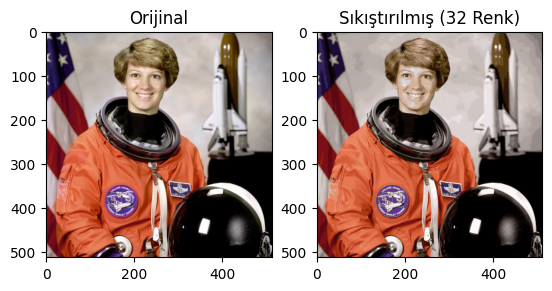

In [41]:
plt.subplot(1, 2, 1) # 1 satır, 2 sütun, 1. bölge
plt.imshow(img)
plt.title('Orijinal')

plt.subplot(1, 2, 2) # 1 satır, 2 sütun, 2. bölge
plt.imshow(img_compressed)
plt.title('Sıkıştırılmış (32 Renk)')

Aferin! 💪

Bazı renkler kaybolmuş, ancak orijinal görüntüyü kolayca tanıyabilirsiniz.

🏁 **Not defterinizi itmeyi unutmayın.**  

Günün görevlerini yerine getirin ve zamanınız olursa buraya geri dönün 😉

## 5 - İsteğe bağlı) elbow yöntemini kullanın

En az renk bilgisini kaybeden optimum sıkıştırmayı bulmak için elbow yöntemini kullanmayı deneyebilirsiniz.   

Örneğin, [5, 10, 20, 30, 50, 70, 100] listesindeki `n_clusters` için `inertia` değerini çizmeye çalışın.  

⚠️ Uzun süren eğitim, birkaç dakika beklemeniz gerekebilir.

In [44]:
wcss=[]
for i in [5, 10, 20, 30, 50, 70, 100]:
    kmeans = KMeans(n_clusters = i, max_iter=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [46]:
# 1. Önce merkezleri (renkleri) alıyoruz
centers = kmeans.cluster_centers_

# 2. Hata buradaydı: 'labels' değişkenini kmeans'in içinden çekiyoruz
labels = kmeans.labels_ 

# 3. Şimdi merkezleri etiketlere göre eşleştirebiliriz
X_compressed = centers[labels]

# 4. Geri kalan işlemler aynı
X_compressed = X_compressed.astype('uint8')
img_compressed = X_compressed.reshape(img_shape)

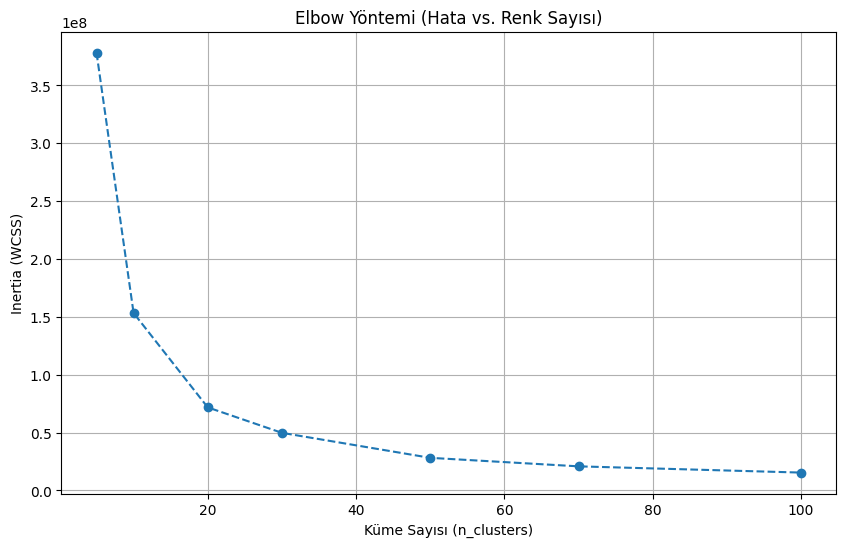

In [47]:
plt.figure(figsize=(10, 6))
# X ekseni: Küme sayıları, Y ekseni: Hata değerleri (wcss)
plt.plot([5, 10, 20, 30, 50, 70, 100], wcss, marker='o', linestyle='--')
plt.title('Elbow Yöntemi (Hata vs. Renk Sayısı)')
plt.xlabel('Küme Sayısı (n_clusters)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

❓ Aşağıdaki hücreyi çalıştırarak, farklı sayıda küme kullanarak sıkıştırılmış görüntünüzü görselleştirin  
⚠️ Bu uzun bir eğitimdir, birkaç dakika beklemeniz gerekecektir

working with 1 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 1 clusters...
The Kmeans inertia is equal to 4891993276.003909


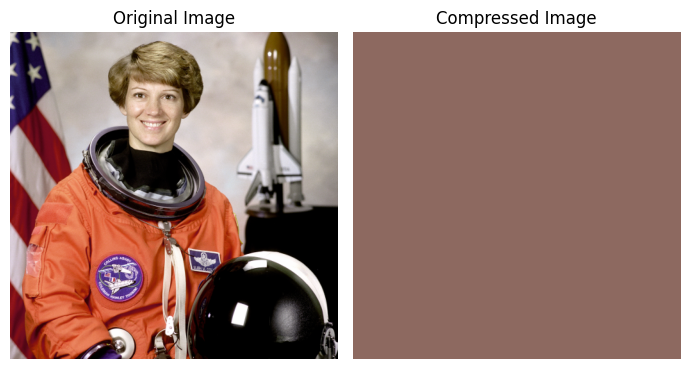

working with 2 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 2 clusters...
The Kmeans inertia is equal to 1509790653.9688501


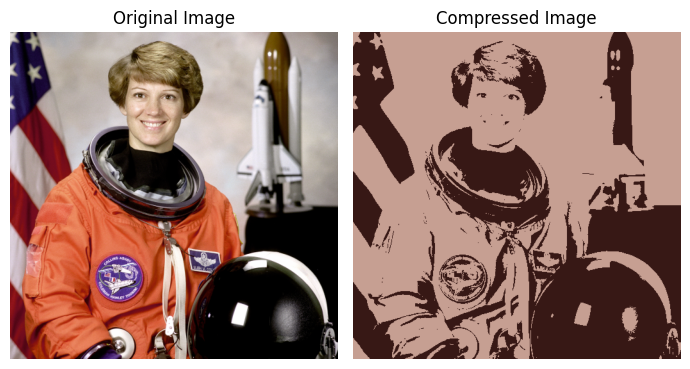

working with 5 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 5 clusters...
The Kmeans inertia is equal to 378229177.87795717


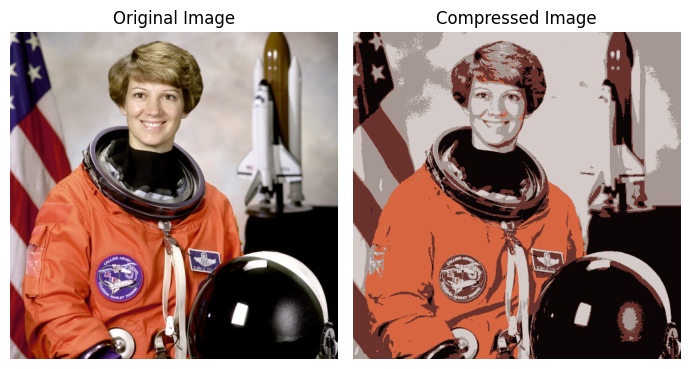

working with 10 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 10 clusters...
The Kmeans inertia is equal to 164790003.08006507


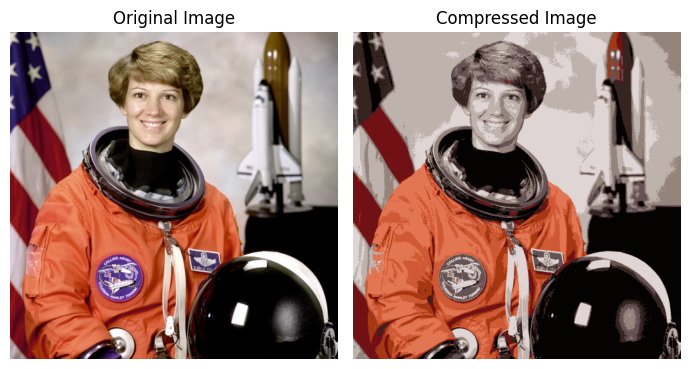

working with 20 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 20 clusters...
The Kmeans inertia is equal to 71914105.79401708


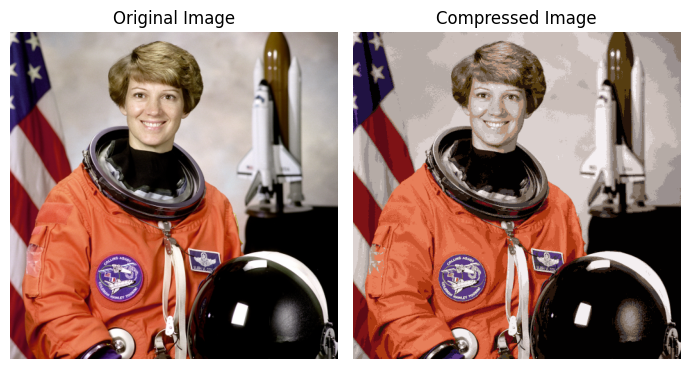

working with 30 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 30 clusters...
The Kmeans inertia is equal to 45509495.39587234


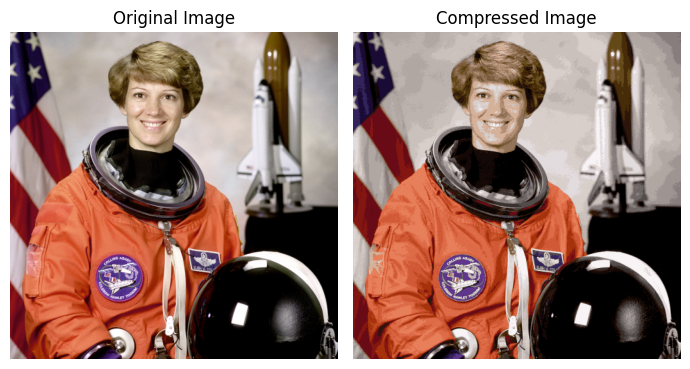

working with 50 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 50 clusters...
The Kmeans inertia is equal to 28152075.73403675


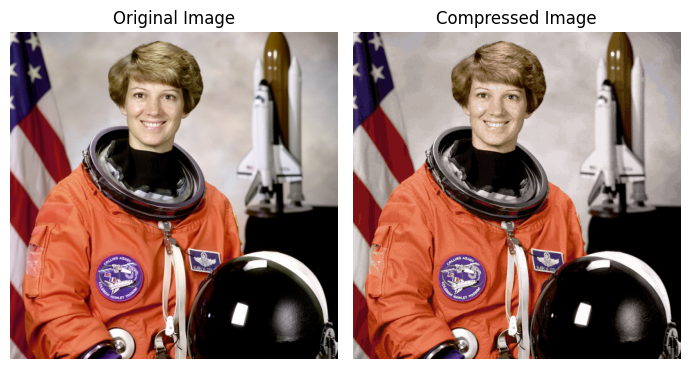

working with 70 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 70 clusters...
The Kmeans inertia is equal to 20950970.66915832


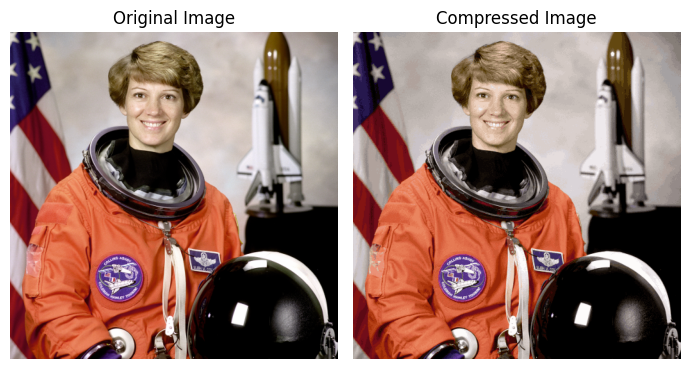

working with 100 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 100 clusters...
The Kmeans inertia is equal to 15378989.288761785


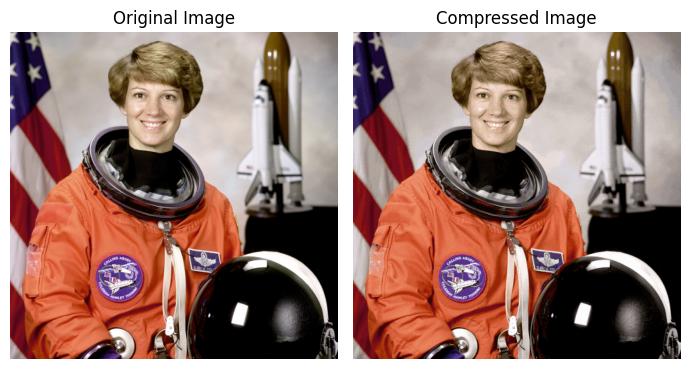

In [48]:
wcss = []
compressed_astronaut = []
for i in [1, 2, 5, 10, 20, 30, 50, 70, 100]:
    print('working with ' + str(i) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = i, max_iter=10)
    kmeans.fit(X)
    # inertia hesapla
    wcss.append(kmeans.inertia_)
    # sıkıştırılmış astronot hesapla
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    X_compressed = centers[labels]
    X_compressed = X_compressed.astype('uint8')
    img_compressed = X_compressed.reshape(img_shape[0], img_shape[1], img_shape[2])
    compressed_astronaut.append(img_compressed)
    # print edin
    print("-"*120)
    print(f"If we compress our 113382 unique colors into {i} clusters...")
    print(f"The Kmeans inertia is equal to {kmeans.inertia_}")
    fig, ax = plt.subplots(1, 2, figsize = (7, 7))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_compressed)
    ax[1].set_title('Compressed Image')
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()